### Let's do some Agentic AI Test for Crude Oil Trading

In [1]:
#let's load data from yfinance
import pandas as pd
import numpy as np
import yfinance as yfin

In [3]:
ticker = "CL=F"
ticker = yfin.Ticker(ticker)

df = ticker.history(period = '10y')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2014-11-06 00:00:00-05:00 to 2024-11-05 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2514 non-null   float64
 1   High          2514 non-null   float64
 2   Low           2514 non-null   float64
 3   Close         2514 non-null   float64
 4   Volume        2514 non-null   int64  
 5   Dividends     2514 non-null   float64
 6   Stock Splits  2514 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.1 KB


In [4]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-30 00:00:00-04:00,67.470001,69.169998,67.279999,68.610001,284795,0.0,0.0
2024-10-31 00:00:00-04:00,69.099998,70.809998,68.300003,69.260002,311055,0.0,0.0
2024-11-01 00:00:00-04:00,70.440002,71.449997,69.320000,69.489998,320572,0.0,0.0
2024-11-04 00:00:00-05:00,70.290001,71.809998,70.250000,71.470001,286947,0.0,0.0
2024-11-05 00:00:00-05:00,71.620003,72.669998,71.290001,71.989998,247311,0.0,0.0


In [5]:
import requests

api_key = "YOUR_ALPHA_VANTAGE_API_KEY"
symbol = "CL"  # WTI Crude Oil Futures
interval = "1min"  # Time interval between data points

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={api_key}"
response = requests.get(url)
data = response.json()

# Check if the response contains the expected data
if "Time Series (1min)" in data:
    time_series = data["Time Series (1min)"]
    # Get the latest timestamp
    latest_timestamp = next(iter(time_series))
    latest_data = time_series[latest_timestamp]
    print(f"Latest data for {symbol} at {latest_timestamp}:")
    print(f"Open: {latest_data['1. open']}")
    print(f"High: {latest_data['2. high']}")
    print(f"Low: {latest_data['3. low']}")
    print(f"Close: {latest_data['4. close']}")
    print(f"Volume: {latest_data['5. volume']}")
else:
    print("Error fetching data. Please check your API key and parameters.")


{'Error Message': 'This API function (COMMODITY_INTRADAY) does not exist.'}


In [9]:
import requests

api_key = "4WBC6KCN943EXCOV"
symbol = "CL"  # WTI Crude Oil Futures
interval = "1min"  # Time interval between data points

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={api_key}"
response = requests.get(url)
data = response.json()

# Check if the response contains the expected data
if "Time Series (1min)" in data:
    time_series = data["Time Series (1min)"]
    # Get the latest timestamp
    latest_timestamp = next(iter(time_series))
    latest_data = time_series[latest_timestamp]
    print(f"Latest data for {symbol} at {latest_timestamp}:")
    print(f"Open: {latest_data['1. open']}")
    print(f"High: {latest_data['2. high']}")
    print(f"Low: {latest_data['3. low']}")
    print(f"Close: {latest_data['4. close']}")
    print(f"Volume: {latest_data['5. volume']}")
else:
    print("Error fetching data. Please check your API key and parameters.")


Latest data for CL at 2024-11-06 19:58:00:
Open: 90.5999
High: 90.6000
Low: 90.5999
Close: 90.6000
Volume: 40


In [11]:
len(data)

2

In [12]:
data

{'Meta Data': {'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
  '2. Symbol': 'CL',
  '3. Last Refreshed': '2024-11-06 19:58:00',
  '4. Interval': '1min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (1min)': {'2024-11-06 19:58:00': {'1. open': '90.5999',
   '2. high': '90.6000',
   '3. low': '90.5999',
   '4. close': '90.6000',
   '5. volume': '40'},
  '2024-11-06 19:57:00': {'1. open': '90.2600',
   '2. high': '90.2600',
   '3. low': '90.2600',
   '4. close': '90.2600',
   '5. volume': '10'},
  '2024-11-06 19:55:00': {'1. open': '90.5999',
   '2. high': '90.6000',
   '3. low': '90.5999',
   '4. close': '90.6000',
   '5. volume': '6'},
  '2024-11-06 19:52:00': {'1. open': '90.6000',
   '2. high': '90.6000',
   '3. low': '90.6000',
   '4. close': '90.6000',
   '5. volume': '1'},
  '2024-11-06 19:43:00': {'1. open': '90.6000',
   '2. high': '90.6000',
   '3. low': '90.5900',
   '4. close': '90.5900',
   '5. volume': '6'},
  

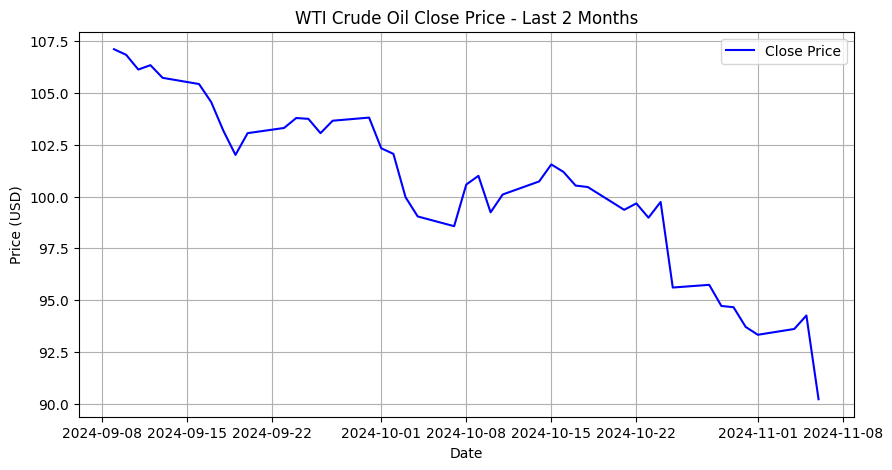

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Replace with your actual API key
api_key = "4WBC6KCN943EXCOV"
symbol = "CL"  # WTI Crude Oil Futures

# Get daily data with compact outputsize to get the last ~3 months
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=compact"
response = requests.get(url)
data = response.json()

# Check if the response contains the expected data and parse it into a DataFrame
if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]
    df = pd.DataFrame.from_dict(time_series, orient="index")
    df = df.rename(columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "4. close": "Close",
        "5. volume": "Volume"
    })
    df.index = pd.to_datetime(df.index)  # Convert index to datetime
    df = df.sort_index()  # Sort by date in ascending order

    # Filter to keep only the last 2 months of data
    two_months_ago = datetime.now() - timedelta(days=60)
    df = df[df.index >= two_months_ago]

    # Convert columns to numeric values for plotting
    df["Open"] = pd.to_numeric(df["Open"])
    df["High"] = pd.to_numeric(df["High"])
    df["Low"] = pd.to_numeric(df["Low"])
    df["Close"] = pd.to_numeric(df["Close"])

    # Plot the close prices over the last 2 months
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df["Close"], label="Close Price", color="blue")
    plt.title("WTI Crude Oil Close Price - Last 2 Months")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Error fetching data. Please check your API key and parameters.")


In [14]:
import requests

# Replace with your NewsAPI key
api_key = "aa79eb025817495cbf5641aadb0def4e"

# Define the query for topics of interest
query = "crude oil OR world news OR conflict"

# Set up the API URL
url = f"https://newsapi.org/v2/everything?q={query}&pageSize=7&sortBy=publishedAt&language=en&apiKey={api_key}"

# Make the request to NewsAPI
response = requests.get(url)
news_data = response.json()

# Check if the response is valid and contains articles
if news_data.get("status") == "ok":
    articles = news_data["articles"]
    print("Top Articles Related to Crude Oil, World News, and Conflicts:\n")
    for i, article in enumerate(articles, start=1):
        print(f"{i}. Title: {article['title']}")
        print(f"   Source: {article['source']['name']}")
        print(f"   Published At: {article['publishedAt']}")
        print(f"   Description: {article['description']}")
        print(f"   URL: {article['url']}\n")
else:
    print("Error fetching news data. Please check your API key and parameters.")


Top Articles Related to Crude Oil, World News, and Conflicts:

1. Title: JASON CHAFFETZ: How did Trump do it?
   Source: Fox News
   Published At: 2024-11-06T07:57:27Z
   Description: Former President Donald Trump ran on strength and making America great again. The traditional legacy media never understood the power of that vision.
   URL: https://www.foxnews.com/opinion/jason-chaffetz-how-did-trump-do-it

2. Title: Sable Offshore (NYSE:SOC) & Extraction Oil & Gas (OTCMKTS:XOGAQ) Critical Survey
   Source: ETF Daily News
   Published At: 2024-11-06T07:54:58Z
   Description: Extraction Oil & Gas (OTCMKTS:XOGAQ – Get Free Report) and Sable Offshore (NYSE:SOC – Get Free Report) are both small-cap oils/energy companies, but which is the superior business? We will contrast the two companies based on the strength of their valuation, a…
   URL: https://www.etfdailynews.com/2024/11/06/sable-offshore-nysesoc-extraction-oil-gas-otcmktsxogaq-critical-survey/

3. Title: Head-To-Head Analysis: VAAL